In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\johnn\\OneDrive\\Desktop\\ML_DATASETS\\CLASSIFICATION\\iris\\iris.data")

In [3]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isna().sum()

Sepal Length     0
Sepal Width      0
 Petal Length    0
Petal Width      0
Class            0
dtype: int64

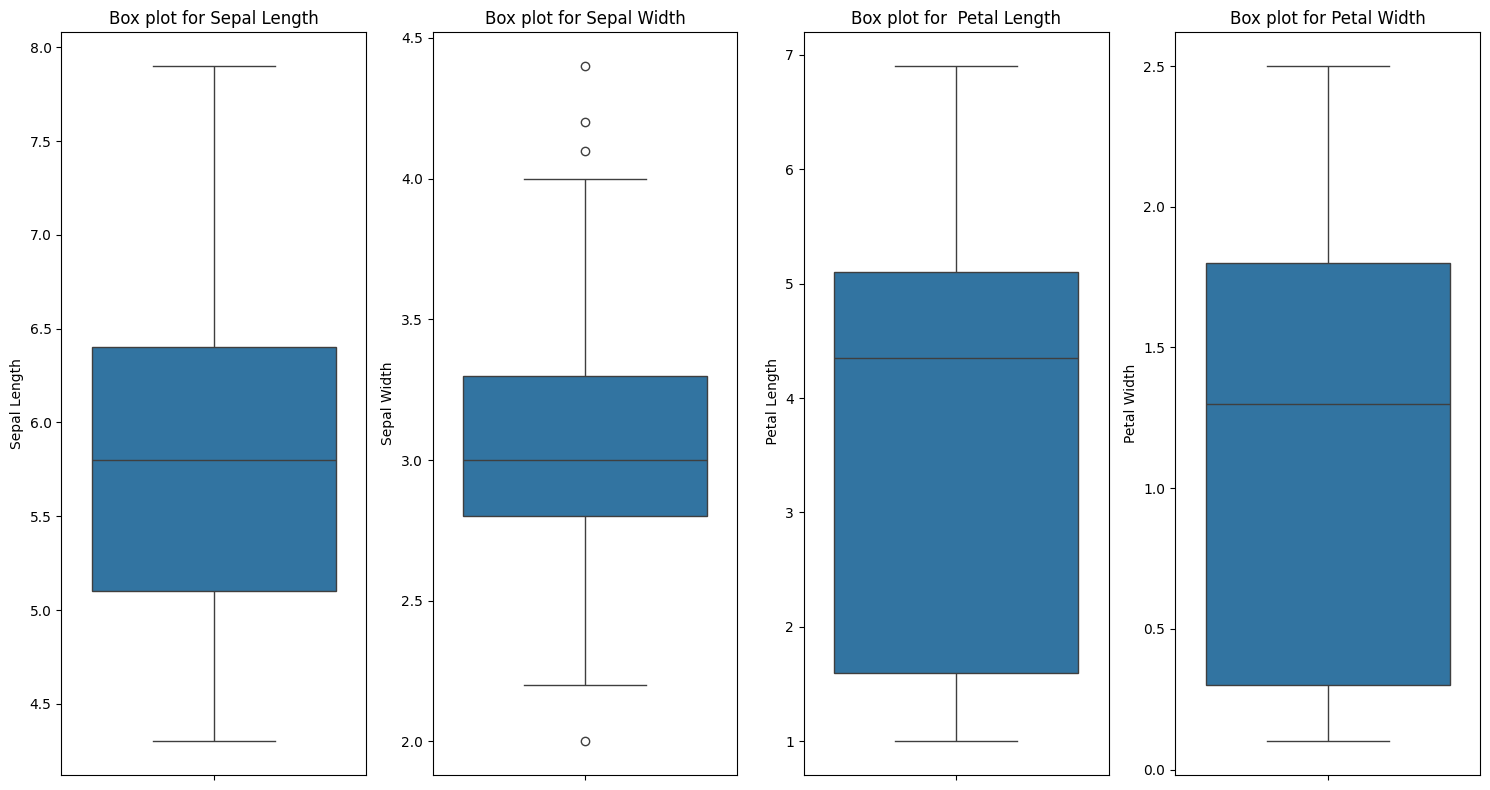

In [5]:
def plot_boxplots(df):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include='number').columns

    # Set up the matplotlib figure
    plt.figure(figsize=(15, 8))
    for i, column in enumerate(numeric_columns, start=1):
        plt.subplot(1, len(numeric_columns), i)
        sns.boxplot(y=df[column])
        plt.title(f'Box plot for {column}')

    plt.tight_layout()
    plt.show()
plot_boxplots(data)

In [6]:
def extract_outliers(df,column,threshold=1.5):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-threshold*iqr
    upper_bound=q3+threshold*iqr
    outliers=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
    return outliers
outliers_iqr=extract_outliers(data,'Sepal Width')
print(outliers_iqr)


    Sepal Length  Sepal Width   Petal Length  Petal Width            Class
15           5.7          4.4            1.5          0.4      Iris-setosa
32           5.2          4.1            1.5          0.1      Iris-setosa
33           5.5          4.2            1.4          0.2      Iris-setosa
60           5.0          2.0            3.5          1.0  Iris-versicolor


In [7]:
data_cleaned = data[~data['Sepal Width'].isin(outliers_iqr['Sepal Width'])]

In [8]:
data_cleaned

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
x=data_cleaned.drop('Class',axis=1)
x

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y=data_cleaned[['Class']]
y

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6)

In [17]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x_train)

c:\Users\printL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [18]:
kmeans.cluster_centers_

array([[4.90357143, 3.29285714, 1.45714286, 0.23571429],
       [6.04166667, 2.76944444, 4.4       , 1.39166667],
       [6.75652174, 3.03043478, 5.63913043, 2.05217391]])

In [19]:
y_pred=kmeans.predict(x_test)
y_pred

array([2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1,
       1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1])

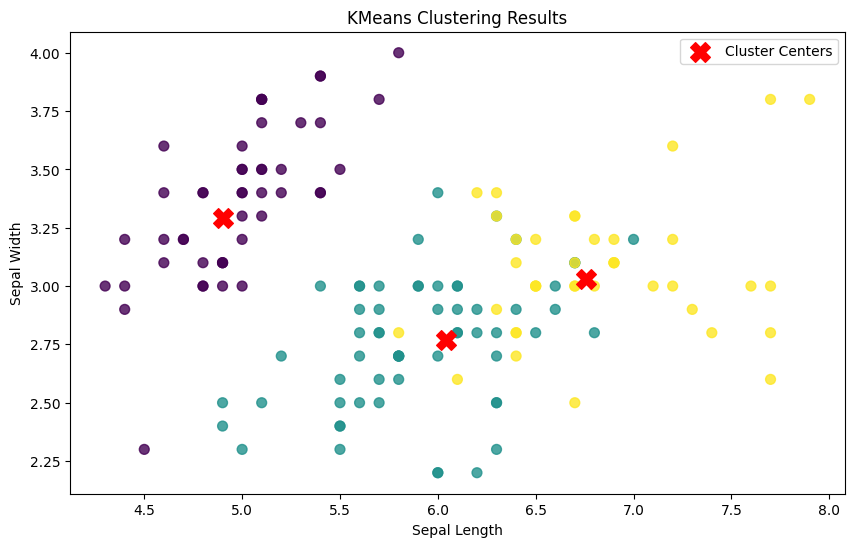

In [23]:
plt.figure(figsize=(10, 6))

# Plot the original data points
plt.scatter(data_cleaned['Sepal Length'], data_cleaned['Sepal Width'], c=kmeans.predict(x), cmap='viridis', s=50, alpha=0.8)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.title('KMeans Clustering Results')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
